<a href="https://colab.research.google.com/github/raghulstar/ImageProcessing---PIL/blob/main/ImageProcessing_Pillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading images from drive
image_x = "/content/drive/My Drive/x.png"
image_o = "/content/drive/My Drive/o.png"

size of the image:  (256, 256)  colour mode: RGB
size of the image:  (256, 256)  colour mode: RGB


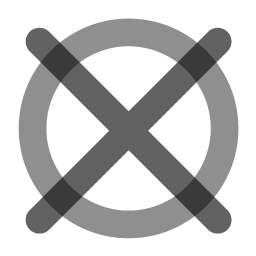

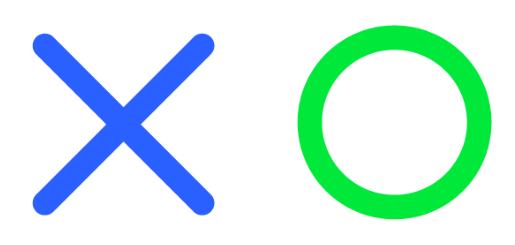

In [4]:
from PIL import Image, ImageChops, ImageFilter
from matplotlib import pyplot as plt

#creating the PIL image objects
x = Image.open(image_x)
o = Image.open(image_o)

#finding out the attributes of image objects
print('size of the image: ', x.size, ' colour mode:', x.mode)
print('size of the image: ', o.size, ' colour mode:', o.mode)

#ploting the images one beside the other
plt.subplot(121), plt.imshow(x)
plt.axis('off')
plt.subplot(122), plt.imshow(o)
plt.axis('off')

#multiplying the images
merged = ImageChops.multiply(x,o)

#adding two images
add = ImageChops.add(x,o)

#converting the colour mode
greyscale = merged.convert('L')
greyscale


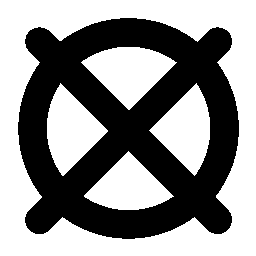

In [5]:
#mapping the pixels of the image so we can use them as coordinates
pixel = greyscale.load()

#a nested loop to parse through all the pixels in the image
for row in range(greyscale.size[0]):
  for column in range(greyscale.size[1]):
    if pixel[row, column] != (255):
      pixel[row,column] = (0)

greyscale

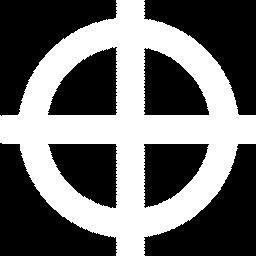

In [6]:
#inverting the image
invert = ImageChops.invert(greyscale)

#inverting by subtraction
bg = Image.new('L', (256, 256), color=(255)) #creating a new image with a solid white background
subt = ImageChops.subtract(bg, greyscale) #subtracting image from background

#rotating the image
rotate = subt.rotate(45)
rotate


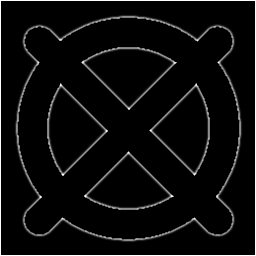

In [7]:
#blurring the image
blur = greyscale.filter(ImageFilter.GaussianBlur(radius=1))

#edge detection
edge = blur.filter(ImageFilter.FIND_EDGES)
edge

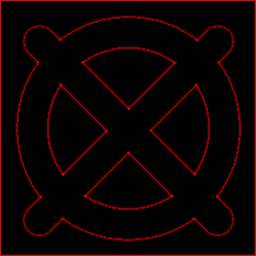

In [8]:
#changing the edge colours
edge = edge.convert('RGB')
bg_red = Image.new('RGB', (256,256), color=(255,0,0))

filled_edge = ImageChops.darker(bg_red, edge)
filled_edge

In [10]:
#save image in the directory
edge.save('/content/drive/My Drive/processed.png')